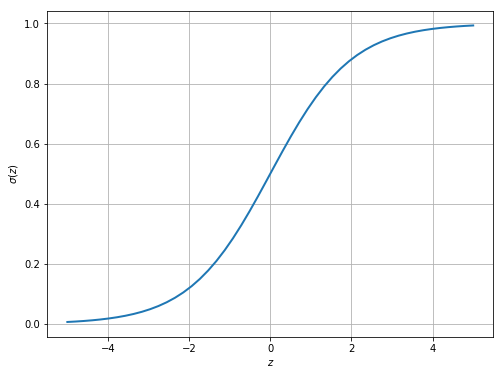

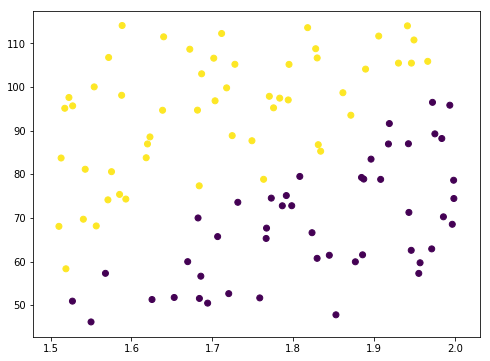

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def fun_log(z):
    return 1/(1+np.exp(-z))
z = np.linspace(-5, 5)

plt.figure(figsize = (8,6))
plt.plot(z, fun_log(z), lw = 2)
plt.xlabel('$z$')
plt.ylabel('$\sigma(z)$')
plt.grid()
plt.show()

def reg_log(B, X):
    Xa = np.append(np.ones((X.shape[0],1)), X, axis=1)
    return fun_log(Xa.dot(B))

x1 = 1.5 + 0.5*np.random.random((100,1))
x2 = 45 + 70*np.random.random((100,1))
X = np.concatenate((x1, x2), axis = 1)
Y = (X[:, 1]/X[:, 0]**2 > 25*np.ones((100,)))*1

plt.figure(figsize = (8,6))
plt.scatter(X[:,0], X[:,1], c=Y)
plt.show()



In [12]:
print(X)

[[  1.70332088  96.85862796]
 [  1.51901545  58.35810301]
 [  1.76644022  65.31288813]
 [  1.58532055  75.40138139]
 [  1.87109517  93.55326029]
 [  1.8080207   79.52366338]
 [  1.91754008  86.9645806 ]
 [  1.5270636   50.94553501]
 [  1.58788106  98.12276774]
 [  1.98348347  88.21509344]
 [  1.86128033  98.70921873]
 [  1.89604976  83.48918257]
 [  1.94102372 114.03680408]
 [  1.54284265  81.1709677 ]
 [  1.87666059  59.96256791]
 [  1.62540102  51.31417519]
 [  1.82941204  60.75210429]
 [  1.94282459  71.27740674]
 [  1.82763807 108.79365892]
 [  1.62286868  88.57721445]
 [  1.95503745  57.30217937]
 [  1.72019939  52.66579892]
 [  1.9661029  105.89965258]
 [  1.91865647  91.64377985]
 [  1.69414262  50.48870723]
 [  1.51307145  83.74578926]
 [  1.77036919  97.88809235]
 [  1.97492949  89.27842996]
 [  1.83379554  85.30697198]
 [  1.76328417  78.86647795]
 [  1.99643649  68.55710159]
 [  1.55648017  68.1776243 ]
 [  1.97100508  62.91728286]
 [  1.99810399  78.65055219]
 [  1.83083024

In [13]:
Y

array([1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1])

In [14]:
import scipy.optimize as opt

In [15]:
def fun_obj(B, X, Y):
    Yhat = 0.99999*reg_log(B, X)
    return np.mean(-Y*np.log(Yhat)-(1-Y)*np.log(1-Yhat))

B0 = np.zeros((3,))

In [16]:
res_clas = opt.minimize(fun_obj, B0, args=(X,Y))
res_clas

D:\ANACONDA\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
D:\ANACONDA\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in multiply
  This is separate from the ipykernel package so we can avoid doing imports until
D:\ANACONDA\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
D:\ANACONDA\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in multiply
  This is separate from the ipykernel package so we can avoid doing imports until
D:\ANACONDA\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
D:\ANACONDA\lib\site-packages\ipykernel_launcher.py:3: Ru

      fun: nan
 hess_inv: array([[ 2.39607669e+10, -2.62850748e+10,  2.86980403e+08],
       [-2.62850748e+10,  2.88348586e+10, -3.14819014e+08],
       [ 2.86980403e+08, -3.14819014e+08,  3.43719515e+06]])
      jac: array([nan, nan, nan])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 845
      nit: 55
     njev: 169
   status: 2
  success: False
        x: array([  96847.73820217, -106239.61658984,    1159.89025371])

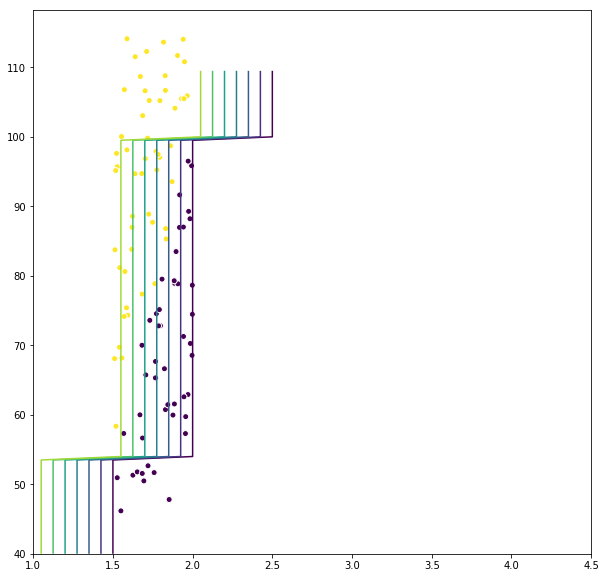

In [28]:
B = res_clas.x
B

x = np.arange(1, 5, 0.5)
y = np.arange(40, 110, 0.5)
Xm, Ym = np.meshgrid(x, y)
m,n = np.shape(Xm)
Xmr = np.reshape(Xm,(m*n,1))
Ymr = np.reshape(Ym,(m*n,1))

Xproof = np.append(Xmr,Ymr,axis=1)

Yg = reg_log(B, Xproof)
Z = np.reshape(Yg, (m,n))
Z = np.round(Z)


plt.figure(figsize=(10,10))
plt.contour(Xm, Ym, Z)
plt.scatter(X[:, 0],X[:, 1], c=Y, edgecolors='w')
plt.show()